## Anomaly Detection

Anomaly Detection is a technique used to identify unusual patterns or outliers in data that do not conform to expected behavior. These anomalies can indicate critical incidents, such as fraud, network intrusions, or system failures. Anomaly detection is widely used in various fields, including finance, healthcare, cybersecurity, and manufacturing.

## Types of Anomalies:

Point Anomalies: A single data point that is significantly different from the rest of the data.

Example: A sudden spike in credit card transactions.

Contextual Anomalies: Data points that are anomalous in a specific context.

Example: A sudden drop in temperature during summer.

Collective Anomalies: A group of data points that are anomalous when occurring together.

Example: A sequence of failed login attempts in a short time frame.


## Techniques for Anomaly Detection:

## Statistical Methods:

Use statistical models to identify deviations from the norm.

Example: Z-score, Gaussian distribution.

### Machine Learning:

Supervised: Train a model on labeled data (normal vs. anomalous).

Unsupervised: Detect anomalies without labeled data (e.g., clustering, autoencoders).

Semi-supervised: Train on normal data only and detect deviations.

### Deep Learning:

Use neural networks like autoencoders or LSTMs for complex data.

### Proximity-Based Methods:

Use distance metrics to identify outliers (e.g., k-nearest neighbors).

### Clustering:

Group similar data points and identify points that do not belong to any cluster.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [121]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, 300)  # Normal data
anomalous_data = np.random.uniform(-5, 5, 20)  # Anomalous data
data = np.concatenate([normal_data, anomalous_data]).reshape(-1, 1)

# Train Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # 5% contamination
model.fit(data)

# Predict anomalies
predictions = model.predict(data)

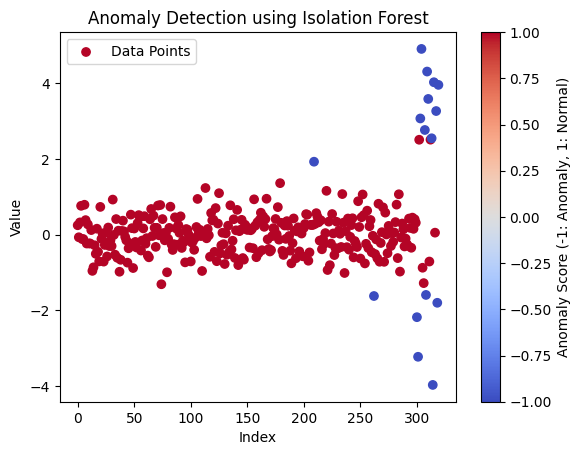

In [122]:
# Visualize results
plt.scatter(range(len(data)), data, c=predictions, cmap='coolwarm', label='Data Points')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar(label='Anomaly Score (-1: Anomaly, 1: Normal)')
plt.legend()
plt.show()

## Applications of Anomaly Detection:

**Fraud Detection:** Identify unusual transactions.

**Network Security:** Detect intrusions or unusual traffic patterns.

**Healthcare:** Monitor patient vitals for abnormal readings.

**Manufacturing:** Detect defects in products.

##  Point Anomaly: Credit Card Fraud Detection

Dataset: Credit Card Fraud Detection Dataset from Kaggle

Description: Contains credit card transactions labeled as fraudulent or genuine.

Anomaly Type: Point anomaly (fraudulent transactions are rare and significantly different from normal transactions).

In [123]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [124]:
# Load dataset
#url = "https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/creditcard.csv"
url ="data/creditcard.csv"
data = pd.read_csv(url)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [125]:
# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Train Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination
model.fit(X)

# Predict anomalies
data['anomaly'] = model.predict(X)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

In [127]:
normal_data = data[data['anomaly']==1]  # Normal data
anomalous_data = data[data['anomaly']==-1]   # Anomalous data

In [128]:
anomalous_data.shape

(2849, 32)

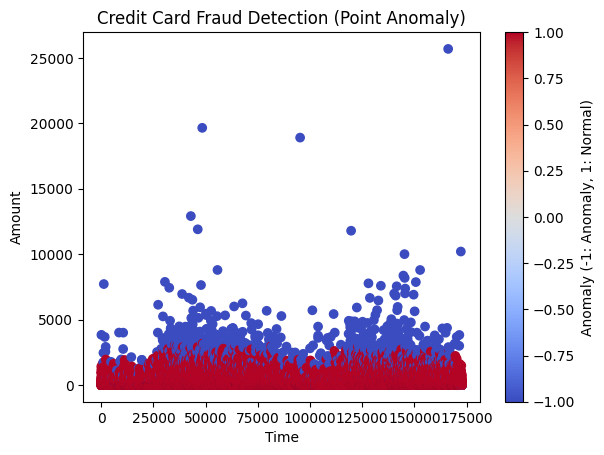

In [129]:
# Visualize anomalies
plt.scatter(data['Time'], data['Amount'], c=data['anomaly'], cmap='coolwarm')
plt.title("Credit Card Fraud Detection (Point Anomaly)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

## Contextual Anomaly: Temperature Monitoring

Dataset: Daily Climate Time Series Data (Kaggle)

Description: Contains daily temperature, humidity, and wind speed data.

Anomaly Type: Contextual anomaly (e.g., unusually high temperature in winter).

In [130]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [131]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [132]:
# Train Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(data[['Temp']])
data

,Temp,anomaly
Date,,
1981-01-01,20.7,1
1981-01-02,17.9,1
1981-01-03,18.8,1
1981-01-04,14.6,1
1981-01-05,15.8,1
...,...,...
1990-12-27,14.0,1
1990-12-28,13.6,1
1990-12-29,13.5,1


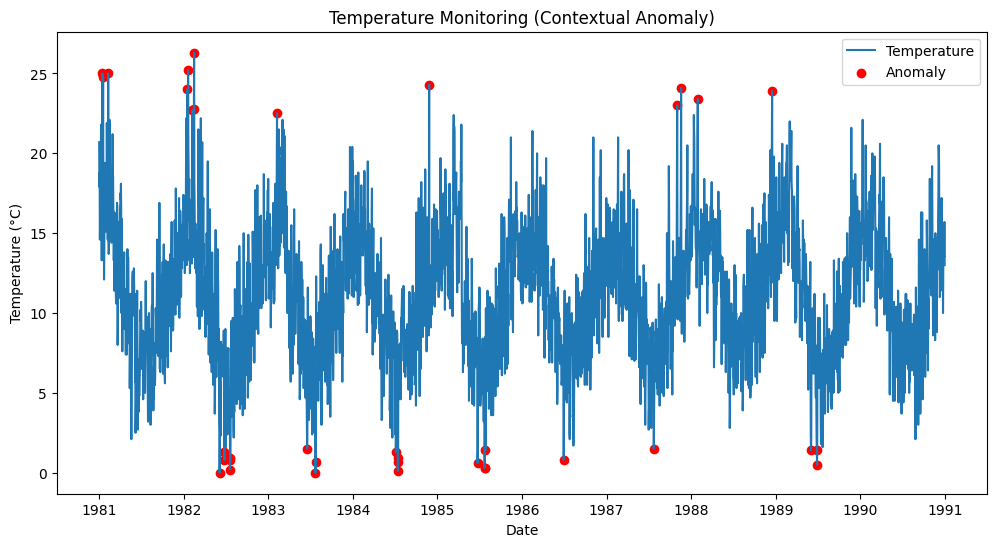

In [133]:
# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temp'], label='Temperature')
plt.scatter(data[data['anomaly'] == -1].index, data[data['anomaly'] == -1]['Temp'], color='red', label='Anomaly')
plt.title("Temperature Monitoring (Contextual Anomaly)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Collective Anomaly: Network Intrusion Detection
Dataset: NSL-KDD Dataset

Description: Contains network traffic data labeled as normal or attack.

Anomaly Type: Collective anomaly (e.g., multiple failed login attempts).

In [134]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [135]:
# Load dataset (sample)
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv"
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
data = pd.read_csv(url, names=columns)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
8,udp,private,SF,105,145,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
0,tcp,smtp,SF,2231,384,0,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
0,tcp,klogin,S0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [136]:
# Focus on 'num_failed_logins' and 'count' features
X = data[['num_failed_logins', 'count']]
X

,num_failed_logins,count
0,0,2
0,0,1
0,0,6
0,1,5
0,1,32
...,...,...
0,0,25
8,0,2
0,1,1
0,0,8


In [137]:
# Train Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,anomaly
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1
0,udp,other,SF,146,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
0,tcp,http,SF,232,8153,0,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
0,tcp,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
8,udp,private,SF,105,145,0,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,1
0,tcp,smtp,SF,2231,384,0,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,1
0,tcp,klogin,S0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


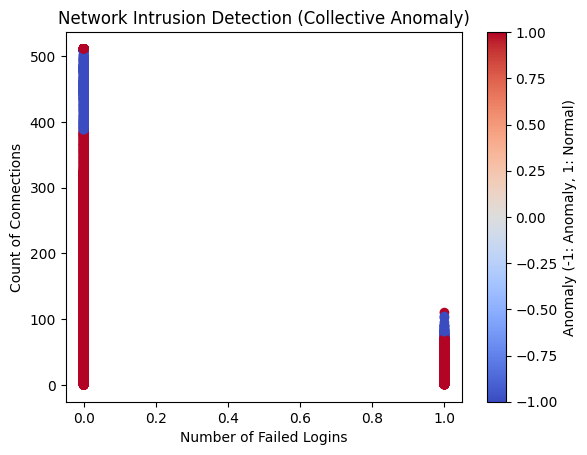

In [138]:
# Visualize anomalies
plt.scatter(data['num_failed_logins'], data['count'], c=data['anomaly'], cmap='coolwarm')
plt.title("Network Intrusion Detection (Collective Anomaly)")
plt.xlabel("Number of Failed Logins")
plt.ylabel("Count of Connections")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

## Temporal Anomaly: ECG Heartbeat Data

Dataset: ECG5000 Dataset

Description: Contains ECG time-series data with normal and abnormal heartbeats.

Anomaly Type: Temporal anomaly (e.g., irregular heartbeat patterns).

In [139]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [140]:
# Load dataset
url = "ECG-Data.csv"
data = pd.read_csv(url)

In [141]:
# Remove quotation marks from column names
data.columns = [col.strip("'") for col in data.columns]
data.columns

Index(['Time and date', 'Direct_1', 'Abdomen_1', 'Abdomen_2', 'Abdomen_3',
       'Abdomen_4', 'EDF Annotations'],
      dtype='object')

In [142]:
 data['Time and date']=data['Time and date'].astype('string')

In [143]:
# Step 1: Remove outer single quotes
data['Time and date'] = data['Time and date'].str.strip("'")
# Step 2: Remove square brackets
data['Time and date'] = data['Time and date'].str.strip('[]')
data['Time and date'] = pd.to_datetime(data['Time and date'], format='%H:%M:%S.%f %d/%m/%Y')

In [144]:
# Features and target
X = data.drop(['Time and date','EDF Annotations'], axis=1)
y = data['EDF Annotations']

In [145]:
X

,Direct_1,Abdomen_1,Abdomen_2,Abdomen_3,Abdomen_4
0,28.800,-8.8,13.400,22.1,32.600
1,26.700,-13.9,12.700,21.8,35.401
2,24.800,-18.7,12.100,21.3,37.601
3,23.800,-23.4,11.500,20.3,39.001
4,23.600,-27.9,10.500,18.6,39.501
...,...,...,...,...,...
9995,75.901,23.1,32.000,18.4,28.500
9996,85.901,25.5,33.901,19.3,30.200
9997,91.401,26.0,33.001,18.2,29.200
9998,91.301,24.6,29.500,15.5,25.900


In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Direct_1   10000 non-null  float64
 1   Abdomen_1  10000 non-null  float64
 2   Abdomen_2  10000 non-null  float64
 3   Abdomen_3  10000 non-null  float64
 4   Abdomen_4  10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [147]:
# Train Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X)

In [148]:
data

,Time and date,Direct_1,Abdomen_1,Abdomen_2,Abdomen_3,Abdomen_4,EDF Annotations,anomaly
0,2011-01-01 00:00:00.000,28.800,-8.8,13.400,22.1,32.600,0.688,1
1,2011-01-01 00:00:00.001,26.700,-13.9,12.700,21.8,35.401,0.688,1
2,2011-01-01 00:00:00.002,24.800,-18.7,12.100,21.3,37.601,0.688,1
3,2011-01-01 00:00:00.003,23.800,-23.4,11.500,20.3,39.001,0.688,1
4,2011-01-01 00:00:00.004,23.600,-27.9,10.500,18.6,39.501,0.688,1
...,...,...,...,...,...,...,...,...
9995,2011-01-01 00:00:09.995,75.901,23.1,32.000,18.4,28.500,0.500,-1
9996,2011-01-01 00:00:09.996,85.901,25.5,33.901,19.3,30.200,0.500,-1
9997,2011-01-01 00:00:09.997,91.401,26.0,33.001,18.2,29.200,0.500,-1
9998,2011-01-01 00:00:09.998,91.301,24.6,29.500,15.5,25.900,0.500,-1


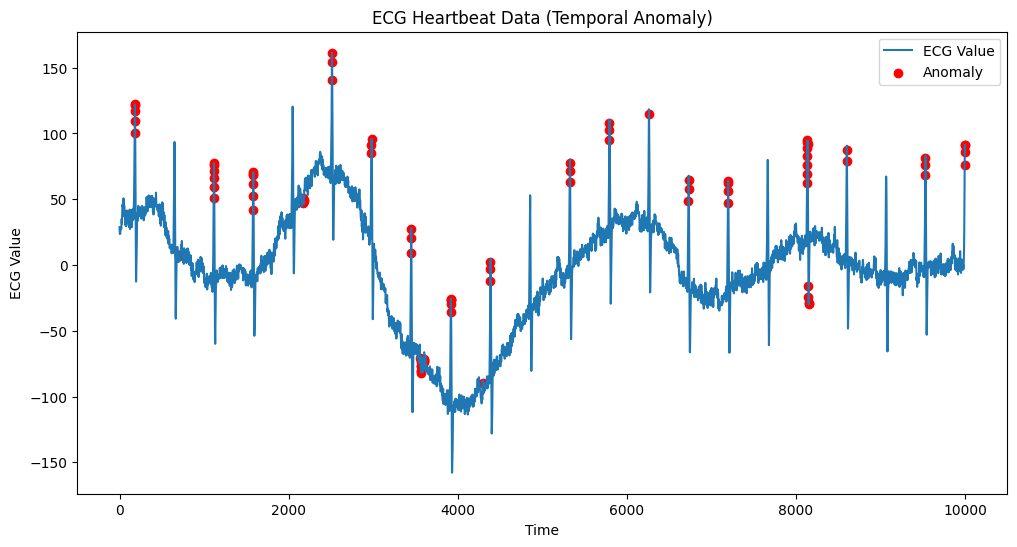

In [149]:
# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Direct_1'], label='ECG Value')
plt.scatter(data[data['anomaly'] == -1].index, data[data['anomaly'] == -1]['Direct_1'], color='red', label='Anomaly')
plt.title("ECG Heartbeat Data (Temporal Anomaly)")
plt.xlabel("Time")
plt.ylabel("ECG Value")
plt.legend()
plt.show()

## Why Isolation forest model only use for anomly detection ?

Isolation Forest is a popular choice for anomaly detection due to its efficiency and effectiveness, there are many other models and techniques that can be used for anomaly detection, depending on the nature of the data and the problem

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score

In [170]:
#Load Data of Credit card Trasaction
url="creditcard.csv"
cdata = pd.read_csv(url)
# Display the first few rows
cdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [178]:
# Separate features and target
X = cdata.drop('Class', axis=1)
y = cdata['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## GaussianMixture Model

In [184]:
# Train GMM
gmm = GaussianMixture(n_components=2, random_state=42)  # 2 components for normal and anomalous
gmm.fit(X_scaled)

# Get anomaly scores (log probabilities)
scores = gmm.score_samples(X_scaled)

In [180]:
scores

array([-36.89756037,  15.8087822 , -50.13393836, ...,  10.01725026,
       -45.1372198 , -26.23567357])

In [181]:
# Set threshold at 5th percentile
threshold = np.percentile(scores, 0.05)
print(f"Threshold: {threshold}")

# Classify anomalies
y_pred = (scores < threshold).astype(int)
print(y_pred)

Threshold: -420.40489296420293
[0 0 0 ... 0 0 0]


In [182]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1-Score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y, -scores)  # Use negative scores because lower scores indicate anomalies
print(f"ROC-AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[284198    117]
 [   466     26]]
Precision: 0.18
Recall: 0.05
F1-Score: 0.08
ROC-AUC Score: 0.94


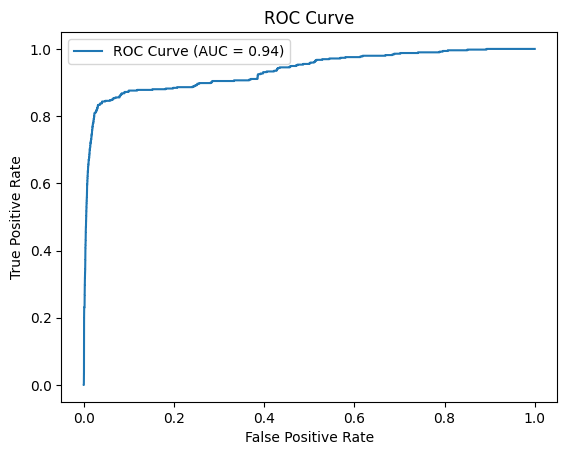

In [183]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y, -scores)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## IsolationForest Model

In [187]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
model.fit(X)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x1B30A2F4D40, 'verbose': 0, 'warm_start': False}


In [189]:
# Predict anomalies
cdata['anomaly_score'] = model.predict(X)
cdata['scores'] = model.decision_function(X)

In [190]:
cdata[cdata['anomaly_score']==-1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_score,scores
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,-0.040993
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1,-0.003585
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-1,-0.043536
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0,-1,-0.026650
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,-1,-0.082750


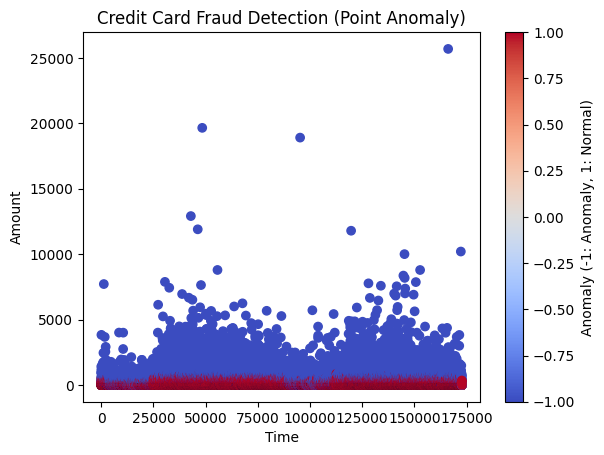

In [192]:
# Visualize anomalies
plt.scatter(cdata['Time'], cdata['Amount'], c=cdata['anomaly_score'], cmap='coolwarm')
plt.title("Credit Card Fraud Detection (Point Anomaly)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

How it works: Groups data points into clusters based on density. Points that do not belong to any cluster are considered anomalies.

Use case: Effective for spatial data and datasets with varying densities.

In [151]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (300, 2))
anomalous_data = np.random.uniform(-5, 5, (20, 2))

data = np.vstack([normal_data, anomalous_data])


In [152]:
# Train DBSCAN
model = DBSCAN(eps=0.3, min_samples=10)  # Adjust parameters as needed
labels = model.fit_predict(data)

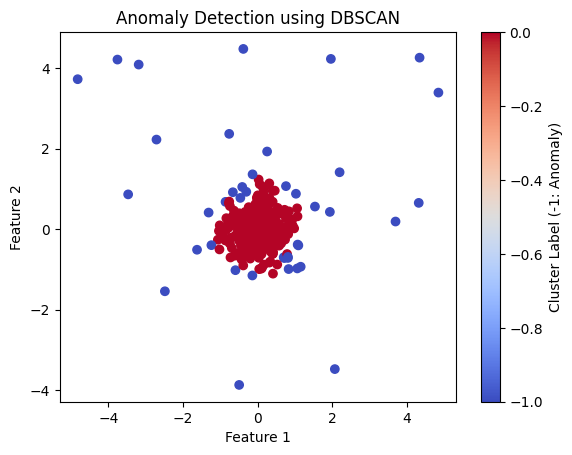

In [153]:
# Visualize anomalies
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Anomaly Detection using DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label (-1: Anomaly)')
plt.show()

## One-Class SVM
How it works: Learns a decision boundary around the normal data points. Points outside the boundary are considered anomalies.
Use case: Effective for datasets where most of the data is normal.


In [154]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (300, 2))
anomalous_data = np.random.uniform(-5, 5, (20, 2))
data = np.vstack([normal_data, anomalous_data])

In [155]:
# Train One-Class SVM
model = OneClassSVM(nu=0.05)  # nu controls the proportion of anomalies
labels = model.fit_predict(data)

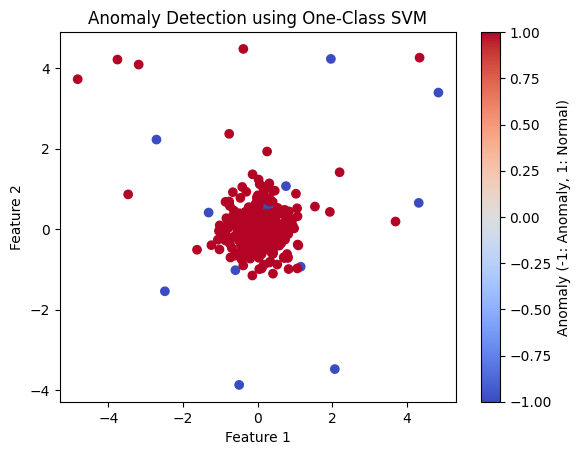

In [156]:
# Visualize anomalies
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Anomaly Detection using One-Class SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

## Autoencoders (Deep Learning)
How it works: A neural network that learns to reconstruct normal data. Anomalies are identified by high reconstruction errors.
Use case: Effective for complex, high-dimensional data like images or time series.

In [157]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (300, 2))
anomalous_data = np.random.uniform(-5, 5, (20, 2))
data = np.vstack([normal_data, anomalous_data])


In [158]:
# Build autoencoder
input_dim = data.shape[1]
encoding_dim = 1  # Latent space dimension

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = layers.Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = models.Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mse')

In [159]:
# Train autoencoder
autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True)

# Detect anomalies
reconstructions = autoencoder.predict(data)
mse = np.mean(np.power(data - reconstructions, 2), axis=1)
threshold = np.quantile(mse, 0.95)  # Set threshold at 95th percentile
anomalies = mse > threshold

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8634  
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9638 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9970 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0980 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0103 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8681 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0236 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8556 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8188 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9621 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8612 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8707 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7588 
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9160 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0292 
Epo

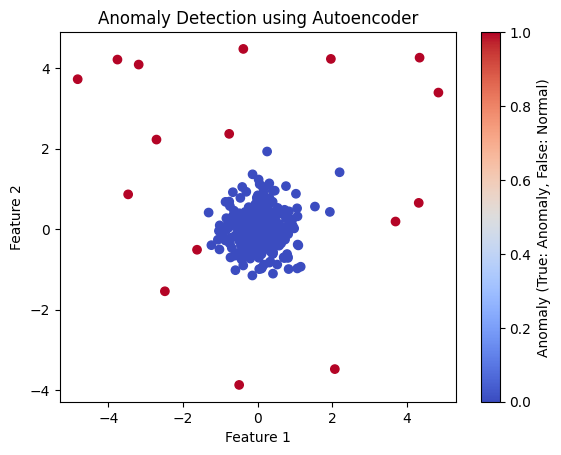

In [160]:
# Visualize anomalies
plt.scatter(data[:, 0], data[:, 1], c=anomalies, cmap='coolwarm')
plt.title("Anomaly Detection using Autoencoder")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Anomaly (True: Anomaly, False: Normal)')
plt.show()

## Local Outlier Factor (LOF)

How it works: Measures the local density deviation of a data point with respect to its neighbors. Points with significantly lower density are considered anomalies.

Use case: Effective for datasets with varying densities.

In [161]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (300, 2))
anomalous_data = np.random.uniform(-5, 5, (20, 2))
data = np.vstack([normal_data, anomalous_data])

In [162]:
# Train LOF
model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = model.fit_predict(data)

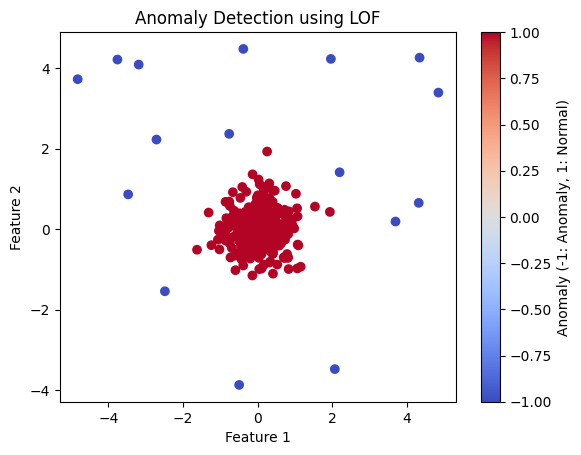

In [163]:
# Visualize anomalies
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Anomaly Detection using LOF")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

## Gaussian Mixture Models (GMM)

How it works: Models the data as a mixture of Gaussian distributions. Points with low probability are considered anomalies.
Use case: Effective for datasets with multiple clusters.

In [164]:
# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (300, 2))
anomalous_data = np.random.uniform(-5, 5, (20, 2))
data = np.vstack([normal_data, anomalous_data])

In [165]:
# Train GMM
model = GaussianMixture(n_components=2)  # Number of clusters
model.fit(data)

GaussianMixture(n_components=2)

In [166]:
# Detect anomalies
scores = model.score_samples(data)
threshold = np.quantile(scores, 0.05)  # Set threshold at 5th percentile
anomalies = scores < threshold
print(anomalies)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

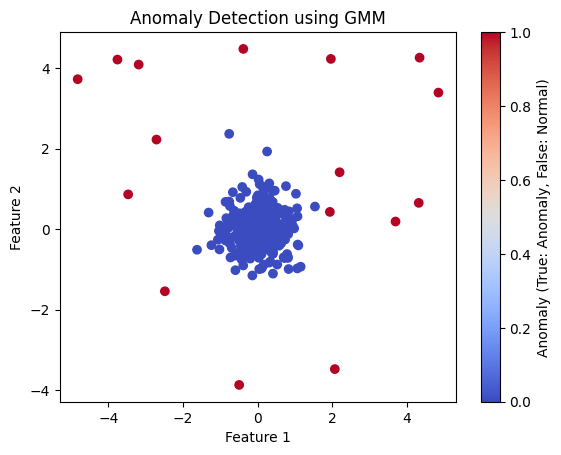

In [167]:
# Visualize anomalies
plt.scatter(data[:, 0], data[:, 1], c=anomalies, cmap='coolwarm')
plt.title("Anomaly Detection using GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Anomaly (True: Anomaly, False: Normal)')
plt.show()

## Anomaly Detection Best Model

1) **Isolation Forest**: Efficient works well with height -dimentional data  usage for normal data
2) **DBSCAN**  : Handles varying densities , on need to specify , usages for spatical data , density based anomalies
3) **One Class SVM** : Learns a decision Bboundary arround normal data , dataset with mostly uses for normal data
4) **Autoencoders** : Handles complex Hight-dimentional data , uses for Imagess , timeseries, deep learing base anomaly detection
5) **Local Outlier factor**: Detects local anomalies in varying density dataset , density base amomaly detect
6) **Gaussian Mixtrure Model**: Models data as a mixture of guassian distribution , cluster data probabilistic approach
